In [8]:
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from sklearn.metrics import accuracy_score
import soundfile as sf

In [9]:

def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfccs

In [10]:

def convert_to_wav(mp3_file):
    wav_file = mp3_file[:-4] + ".wav"
    audio, samplerate = sf.read(mp3_file)
    sf.write(wav_file, audio, samplerate)
    return wav_file


In [11]:
# Set the path to your dataset directories for Hindi and Marathi audio files
hindi_directory = r"D:\college\sem6\POWEER\eng\eng1\Hindi"
marathi_directory = r"D:\college\sem6\POWEER\eng\eng1\Marathi"
english_directory = r"D:\college\sem6\POWEER\eng\eng1\English"

# Load Hindi audio data
hindi_speech_labels = []
hindi_speech_data = []

In [12]:

for dirname, _, filenames in os.walk(hindi_directory):
    for filename in filenames:
        label = 0  # Hindi label
        hindi_speech_labels.append(label)
        wav_file_name = os.path.join(dirname, filename)
        hindi_speech_data.append(extract_mfcc(wav_file_name))


In [13]:

# Load Marathi audio data
marathi_speech_labels = []
marathi_speech_data = []


In [14]:

for dirname, _, filenames in os.walk(marathi_directory):
    for filename in filenames:
        label = 1  # Marathi label
        marathi_speech_labels.append(label)
        wav_file_name = os.path.join(dirname, filename)
        marathi_speech_data.append(extract_mfcc(wav_file_name))



c:\Users\SHREE\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=421
  warnings.warn(


In [15]:
# Load English audio data
english_speech_labels = []
english_speech_data = []

In [17]:
# Combine the Hindi, Marathi, and English data
speech_labels = hindi_speech_labels + marathi_speech_labels + english_speech_labels
speech_data = hindi_speech_data + marathi_speech_data + english_speech_data


In [18]:
# Convert speech labels to categorical values
label_encoder = LabelEncoder()
label_encoder.fit(speech_labels)
speech_labels_encoded = label_encoder.transform(speech_labels)
labels_categorical = to_categorical(speech_labels_encoded)

In [19]:
# Convert speech data to numpy array
speech_data_array = np.asarray(speech_data)

In [20]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(speech_data_array, labels_categorical, test_size=0.2, random_state=9)


In [21]:

# Create the LSTM model
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation("relu"))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation("relu"))
    model.add(Dense(labels_categorical.shape[1]))
    model.add(Activation("softmax"))
    model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
    
    return model


In [22]:

# Configure the model for training
model = create_model_LSTM()


In [23]:

# Train the model
model.fit(np.expand_dims(x_train, -1), y_train, validation_data=(np.expand_dims(x_test, -1), y_test), epochs=100, shuffle=True)


Epoch 1/100
9783/9783 [==============================] - 284s 29ms/step - loss: 0.3184 - accuracy: 0.8746 - val_loss: 0.1837 - val_accuracy: 0.9287
Epoch 2/100
9783/9783 [==============================] - 296s 30ms/step - loss: 0.1711 - accuracy: 0.9363 - val_loss: 0.1520 - val_accuracy: 0.9406
Epoch 3/100
9783/9783 [==============================] - 268s 27ms/step - loss: 0.1424 - accuracy: 0.9474 - val_loss: 0.1305 - val_accuracy: 0.9508
Epoch 4/100
9783/9783 [==============================] - 271s 28ms/step - loss: 0.1258 - accuracy: 0.9537 - val_loss: 0.1175 - val_accuracy: 0.9545
Epoch 5/100
9783/9783 [==============================] - 296s 30ms/step - loss: 0.1145 - accuracy: 0.9580 - val_loss: 0.1119 - val_accuracy: 0.9578
Epoch 6/100
9783/9783 [==============================] - 312s 32ms/step - loss: 0.1054 - accuracy: 0.9615 - val_loss: 0.1067 - val_accuracy: 0.9601
Epoch 7/100
9783/9783 [==============================] - 244s 25ms/step - loss: 0.0988 - accuracy: 0.9645 - val_

In [24]:

# Evaluate the model on the testing data
y_pred = model.predict(np.expand_dims(x_test, -1))
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)


2446/2446 [==============================] - 20s 8ms/step
Accuracy: 0.97147968310759


In [32]:

# Predict the language of a given audio file
def predict(wav_filepath):
    test_point = extract_mfcc(wav_filepath)
    test_point = np.reshape(test_point, newshape=(1, 40, 1))
    prediction = model.predict(test_point)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]
    print("Predicted Language:", predicted_label)
    class_probabilities = prediction[0]
    class_accuracy = dict()

    for i, prob in enumerate(class_probabilities):
        language = label_encoder.inverse_transform([i])[0]
        #class_accuracy[language] = round(prob * 100, 2)

    #print("Predicted Language:", predicted_label)
    #print("Class-wise Accuracy:")
    for language, accuracy in class_accuracy.items():
        print(f"{language}: {accuracy}%")
    
    if predicted_label == 0:
        print("hindi")
    elif predicted_label == 1:
        print("marathi")
    
  


In [1]:

# Convert MP3 file to WAV format
mp3_file = r'D:\college\sem6\POWEER\Testing dataset\MaleM(1).mp3'
wav_filepath = convert_to_wav(mp3_file)

# Predict the language
predict(wav_filepath)


NameError: name 'convert_to_wav' is not defined

In [34]:
# Define the path where you want to save the model
model_path = 'D:\college\Final Year Project\hindimarathi model\SpeechReco.h5'


In [36]:

# Save the model
model.save(model_path)
print("Model saved successfully.")



Model saved successfully.


In [35]:
import pickle

# Define the path where you want to save the LabelEncoder
label_encoder_path = 'D:\college\Final Year Project\hindimarathi model\Speechlabel.pkl'

# Save the LabelEncoder
with open(label_encoder_path, 'wb') as file:
    pickle.dump(label_encoder, file)

print("LabelEncoder saved successfully.")


LabelEncoder saved successfully.


In [30]:
import sys
print(sys.executable)


c:\Users\SHREE\AppData\Local\Programs\Python\Python310\python.exe


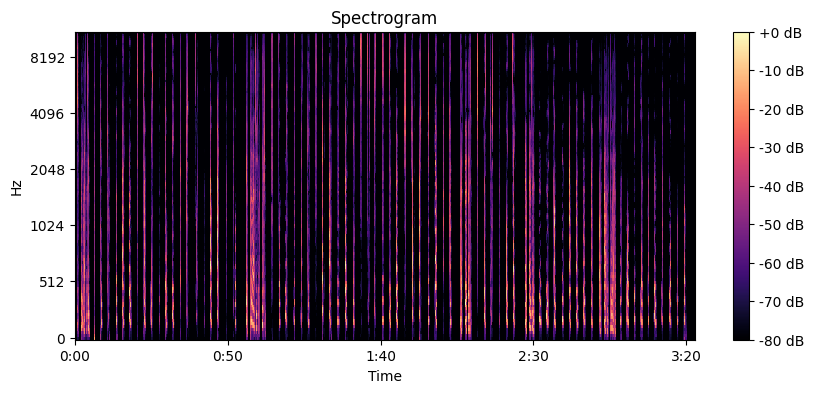

In [31]:
import matplotlib.pyplot as plt
# Load the audio file
audio, sr = librosa.load(wav_filepath)

# Generate the spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()